In [237]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [238]:
data = pd.read_csv("weibo/data_train_all1.csv",encoding='utf-8-sig')

In [239]:
data[data['labels']==5]

,text,labels
1,帕金森法则3个小时能完成的事为什么要30天 UP主 曼鱼的视觉笔记bilibili 哔哩哔...,5
2,帕金森病,5
6,帕金森,5
7,帕金森的金是金泰亨的金无极磁场金泰亨xh被扒出关注了Jennie开了大号也忍不住手滑关注且不...,5
9,帕金森都打不出这个战绩grinning_face_with_sweat,5
...,...,...
3227,这里是帕金森选手,5
3228,塞尔达传说天空之剑帕金森举剑,5
3229,今日帕金森字体,5
3230,帕梅拉十分钟n再次大胆尝试n依旧是都得像帕金森n每三十秒休息两分钟nn3,5


In [240]:
# 将数据集拆分为训练集、验证集和测试集
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# 加载标签和文本
train_labels = train_data.labels.values
val_labels = val_data.labels.values
test_labels = test_data.labels.values

train_texts = train_data.text.values
val_texts = val_data.text.values
test_texts = test_data.text.values

In [ ]:
# # 对文本进行标记化和编码
# from transformers import BertTokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

In [241]:
train_texts=train_texts.tolist()
val_texts=val_texts.tolist()
test_texts=test_texts.tolist()

In [242]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
val_encodings = tokenizer(val_texts, truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt')

In [243]:
# 创建数据加载器
import torch

class WeiboDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = WeiboDataset(train_encodings, train_labels)
val_dataset = WeiboDataset(val_encodings, val_labels)
test_dataset = WeiboDataset(test_encodings, test_labels)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

In [244]:
from transformers import BertForSequenceClassification, AdamW
from tqdm import tqdm

# 加载BERT模型
model = BertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=6)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|                                                                                                                               | 0/130 [00:00<?, ?it/s]/tmp/ipykernel_4128797/2890859794.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 28.49it/s]


Epoch 1/12:
Train Loss: 1.3927  Train Accuracy: 0.4778
Val Loss: 1.0648  Val Accuracy: 0.6383
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 28.23it/s]


Epoch 2/12:
Train Loss: 0.9063  Train Accuracy: 0.6925
Val Loss: 0.8360  Val Accuracy: 0.7079
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 28.00it/s]


Epoch 3/12:
Train Loss: 0.6473  Train Accuracy: 0.7935
Val Loss: 0.7961  Val Accuracy: 0.7215
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 27.86it/s]


Epoch 4/12:
Train Loss: 0.4460  Train Accuracy: 0.8661
Val Loss: 0.7606  Val Accuracy: 0.7505
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 27.80it/s]


Epoch 5/12:
Train Loss: 0.3163  Train Accuracy: 0.9110
Val Loss: 0.7821  Val Accuracy: 0.7485
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 27.51it/s]


Epoch 6/12:
Train Loss: 0.2211  Train Accuracy: 0.9381
Val Loss: 0.8993  Val Accuracy: 0.7350
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 27.47it/s]


Epoch 7/12:
Train Loss: 0.1698  Train Accuracy: 0.9536
Val Loss: 0.8854  Val Accuracy: 0.7176
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 27.40it/s]


Epoch 8/12:
Train Loss: 0.1072  Train Accuracy: 0.9739
Val Loss: 0.8856  Val Accuracy: 0.7350
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 27.44it/s]


Epoch 9/12:
Train Loss: 0.0993  Train Accuracy: 0.9768
Val Loss: 0.8899  Val Accuracy: 0.7311
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 27.34it/s]


Epoch 10/12:
Train Loss: 0.0924  Train Accuracy: 0.9782
Val Loss: 0.8867  Val Accuracy: 0.7369
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 27.36it/s]


Epoch 11/12:
Train Loss: 0.0884  Train Accuracy: 0.9797
Val Loss: 0.8744  Val Accuracy: 0.7369
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 27.34it/s]


Epoch 12/12:
Train Loss: 0.0842  Train Accuracy: 0.9802
Val Loss: 0.8911  Val Accuracy: 0.7350
--------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:01<00:00, 30.28it/s]


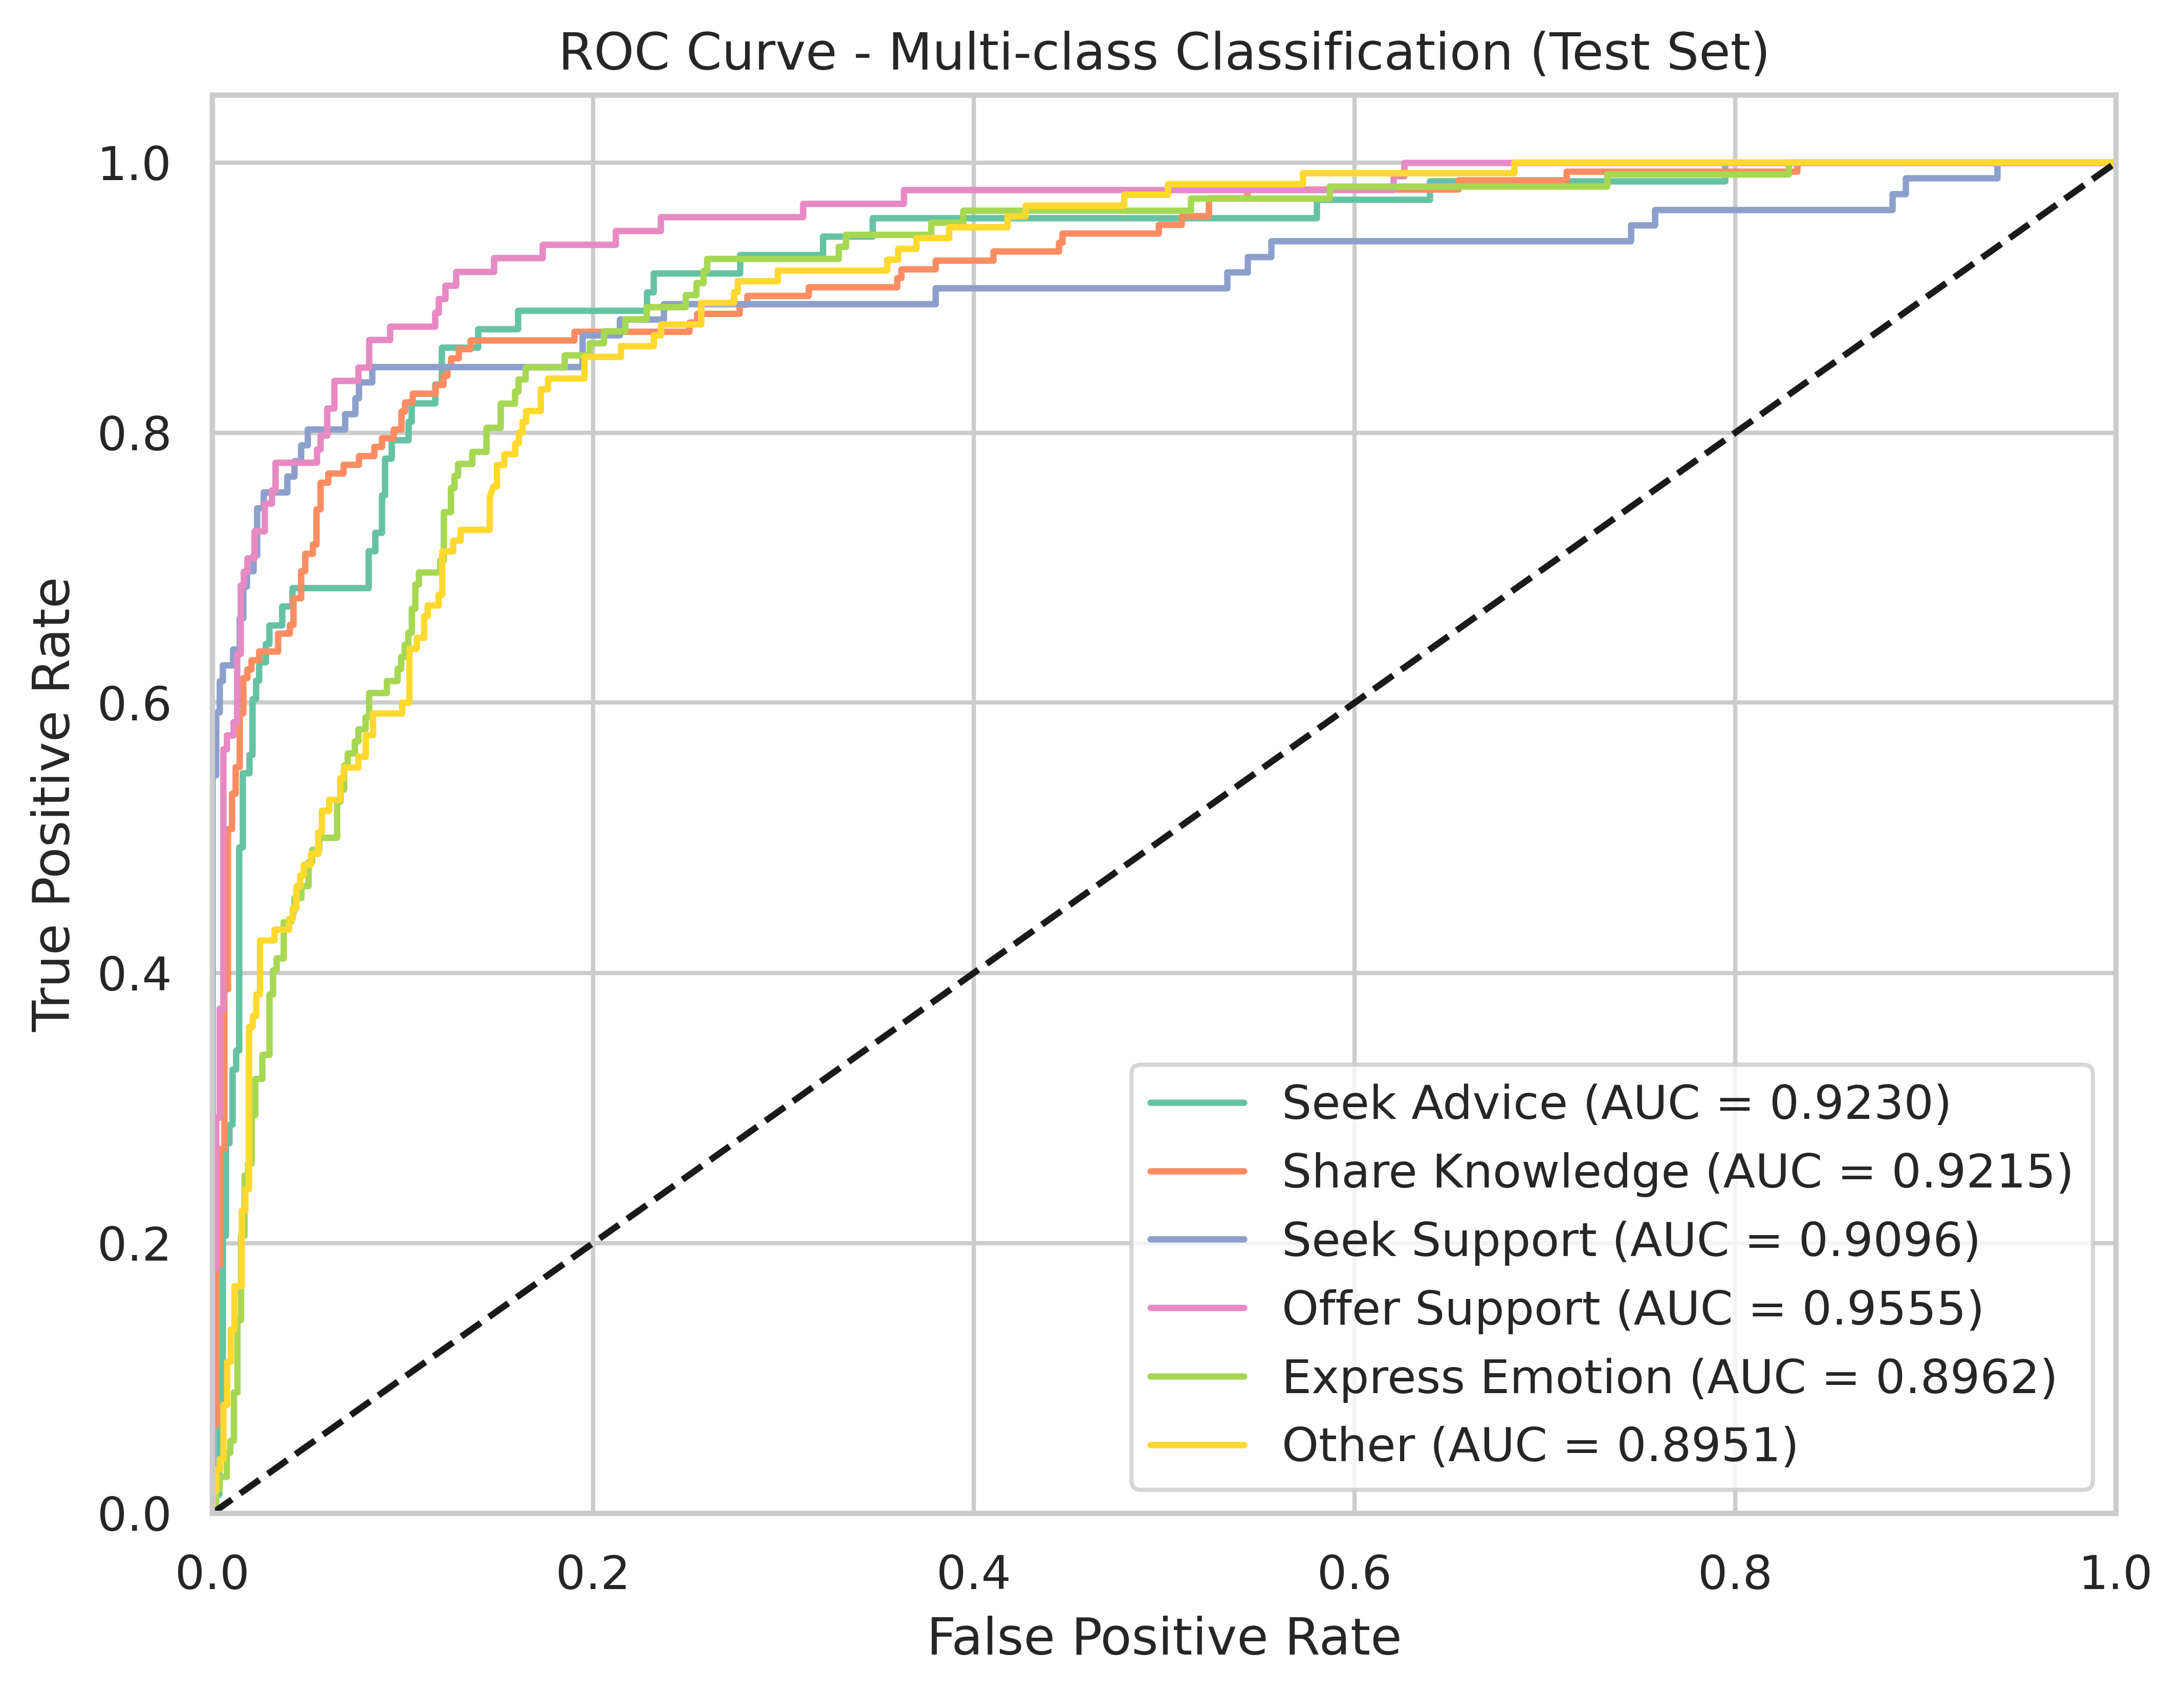

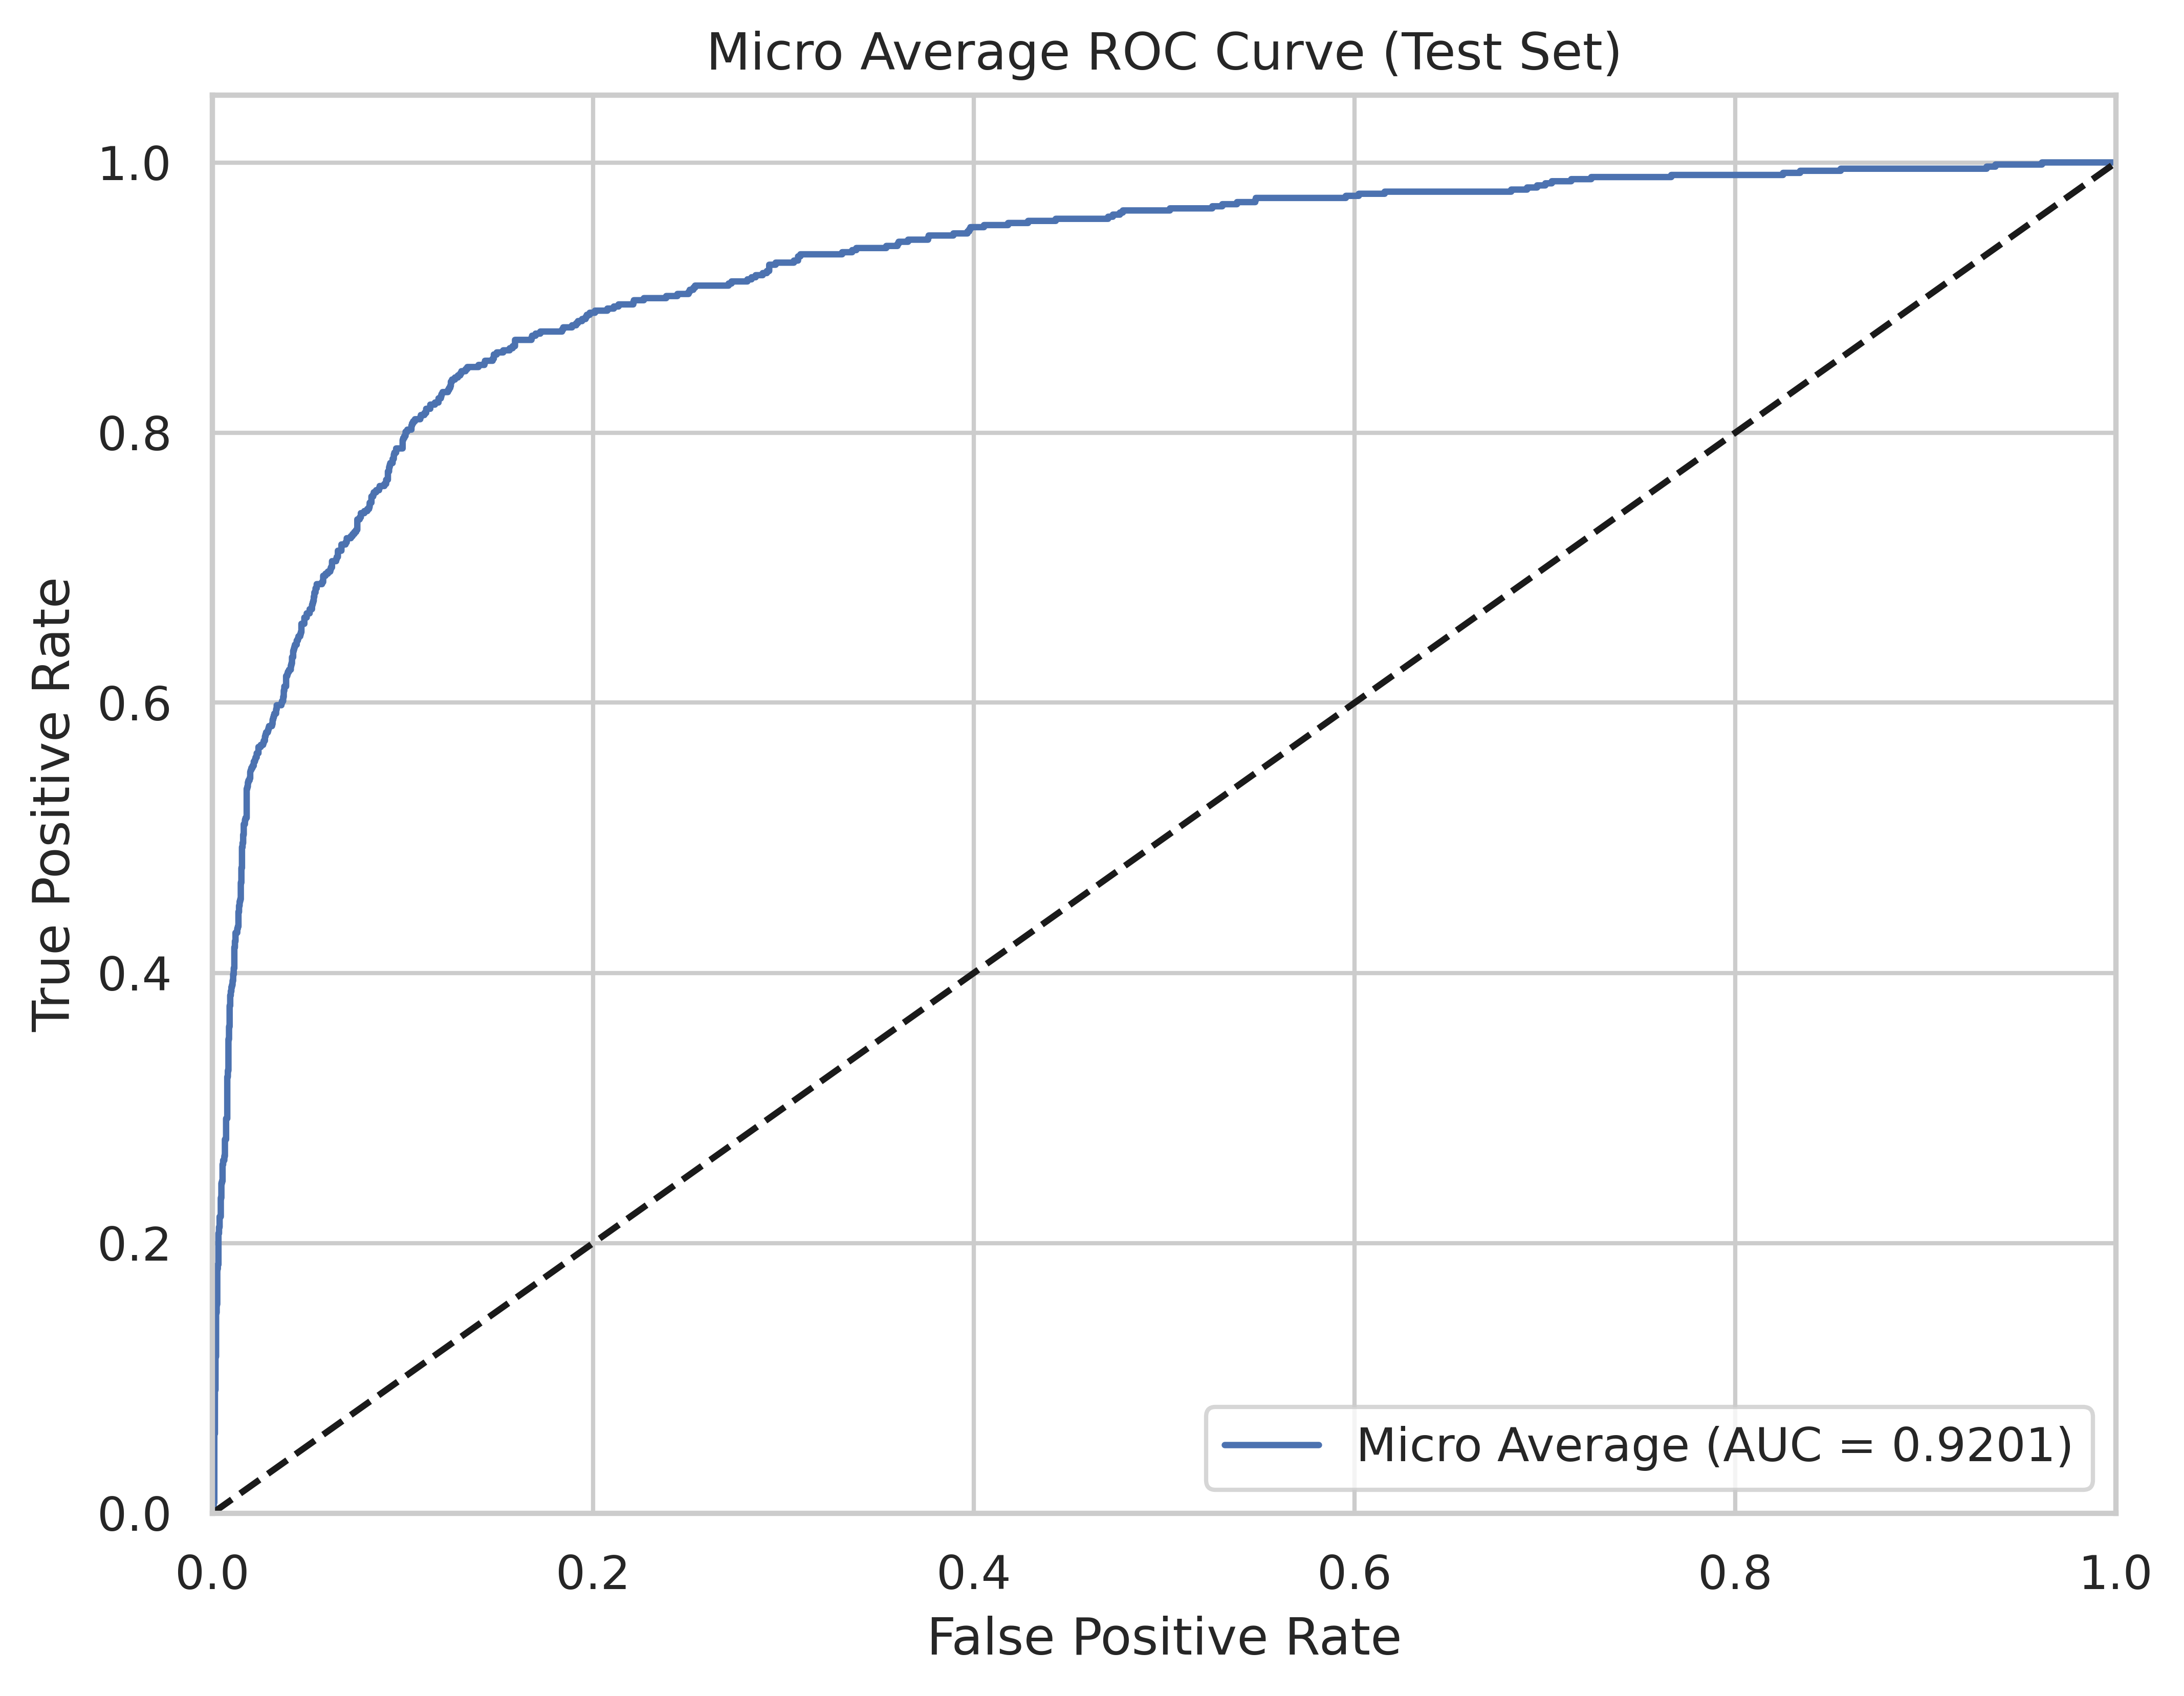

Test Accuracy: 0.7002
Test Precision: 0.7034
Test Recall: 0.6994
Test F1 Score: 0.7007


In [245]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定义训练参数
optimizer = optim.AdamW(model.parameters(), lr=1e-5, eps=1e-8, weight_decay=0.01)  # 添加L2正则化项
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2)

num_epochs = 12

train_losses = []  # 存储训练损失的列表
train_accs = []  # 存储训练集的准确度
val_losses = []  # 存储验证损失的列表
val_accs = []  # 存储验证集的准确度

# 训练BERT模型
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

best_val_loss = float('inf')
best_val_acc = 0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss /= len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # 在验证集上评估模型，并记录验证集的损失和准确度
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    val_probs = []
    val_labels = []
    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()
            val_probs.extend(outputs.logits.softmax(dim=1).cpu().detach().clone().numpy())
            val_labels.extend(labels.cpu().detach().clone().numpy())
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    # 保存在验证集上表现最好的模型参数
    if val_acc > best_val_acc:
        best_val_loss = val_loss
        best_val_acc = val_acc
        #torch.save(model.state_dict(), 'best_model.pth')
    
    # 动态调整学习率
    scheduler.step(val_loss)

    # 打印训练损失和准确度
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}  Train Accuracy: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}  Val Accuracy: {val_acc:.4f}')
    print('--------------------------')

# 在测试集上评估模型，并记录预测概率和真实标签
model.eval()
test_loss = 0
correct = 0
total = 0
test_probs = []
test_labels = []
test_predictions = []
with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()
        test_probs.extend(outputs.logits.softmax(dim=1).cpu().detach().clone().numpy())
        test_labels.extend(labels.cpu().detach().clone().numpy())
        _, predicted = torch.max(outputs.logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_predictions.extend(predicted.cpu().detach().clone().numpy())

test_loss /= len(test_loader)
test_acc = correct / total

# 将test_probs转换为NumPy数组
test_probs = np.array(test_probs)

# 计算每个类别的ROC曲线和AUC值
num_classes = 6
test_labels_bin = label_binarize(test_labels, classes=range(num_classes))

# 替换类别标签
class_labels = ['Seek Advice', 'Share Knowledge', 'Seek Support', 'Offer Support', 'Express Emotion', 'Other']

fpr = []
tpr = []
roc_auc = []

for i in range(num_classes):
    class_fpr, class_tpr, _ = roc_curve(test_labels_bin[:, i], test_probs[:, i])
    fpr.append(class_fpr)
    tpr.append(class_tpr)
    roc_auc.append(auc(class_fpr, class_tpr))

# 绘制多分类的ROC曲线
plt.figure(figsize=(8, 6), dpi=600)
sns.set(style="whitegrid")
colors = sns.color_palette("Set2", n_colors=num_classes)  # 设置颜色
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='{} (AUC = {:.4f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification (Test Set)')
plt.legend(loc='lower right')
plt.savefig('roc_curve.jpg', dpi=600)  # 保存ROC曲线图为JPEG格式
plt.show()

# 计算微平均 ROC 和 AUC
fpr_micro, tpr_micro, _ = roc_curve(test_labels_bin.ravel(), test_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# 绘制微平均 ROC 曲线
plt.figure(figsize=(8, 6), dpi=600)
sns.set(style="whitegrid")
plt.plot(fpr_micro, tpr_micro, label='Micro Average (AUC = {:.4f})'.format(roc_auc_micro))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro Average ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.savefig('micro_avg_roc_curve.jpg', dpi=600)  # 保存微平均ROC曲线图为JPEG格式
plt.show()

# 计算准确率、精确率、召回率和F1分数
test_predictions = np.array(test_predictions)
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions, average='macro')
recall = recall_score(test_labels, test_predictions, average='macro')
f1 = f1_score(test_labels, test_predictions, average='macro')

print("Test Accuracy: {:.4f}".format(accuracy))
print("Test Precision: {:.4f}".format(precision))
print("Test Recall: {:.4f}".format(recall))
print("Test F1 Score: {:.4f}".format(f1))


In [171]:
#打标签
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification

# 加载CSV文件
df = pd.read_csv('cleaned_data.csv')

# 加载Bert模型和分词器
model_name = 'bert_weibo_model_2'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# 设置模型为评估模式
model.eval()

# 定义分类函数
def classify_text(text):
    # 对文本进行分词和编码
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    # 使用Bert模型进行分类
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_labels = logits.argmax(dim=1)

    # 返回预测的标签
    return predicted_labels.item()

# 对每个文本进行分类，并将标签添加到新的一列中
df['labels'] = df['weibo_content'].apply(classify_text)

# 保存包含分类标签的新CSV文件
df.to_csv('weibo/final_data.csv', index=False)
